<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0025_AluraBB_Geopandas01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install geopandas

In [17]:
import geopandas as gpd

In [14]:
! wget https://caelum-online-public.s3.amazonaws.com/985-geopandas/01/Mapas.zip
! unzip Mapas.zip

--2021-07-08 15:38:12--  https://caelum-online-public.s3.amazonaws.com/985-geopandas/01/Mapas.zip
Resolving caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)... 52.217.88.220
Connecting to caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)|52.217.88.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2200604 (2.1M) [application/octet-stream]
Saving to: ‘Mapas.zip’

Mapas.zip           100%[===================>]   2.10M  --.-KB/s    in 0.07s   

2021-07-08 15:38:12 (29.9 MB/s) - ‘Mapas.zip’ saved [2200604/2200604]

Archive:  Mapas.zip
   creating: Mapas/
   creating: Mapas/RJ/
  inflating: Mapas/RJ/33MUE250GC_SIR.shx  
  inflating: Mapas/RJ/33MUE250GC_SIR.shp  
  inflating: Mapas/RJ/33MUE250GC_SIR.prj  
  inflating: Mapas/RJ/33MUE250GC_SIR.dbf  


In [22]:
rj = gpd.read_file('/content/Mapas/RJ/33MUE250GC_SIR.shp')
type(rj)

geopandas.geodataframe.GeoDataFrame

In [23]:
  rj.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


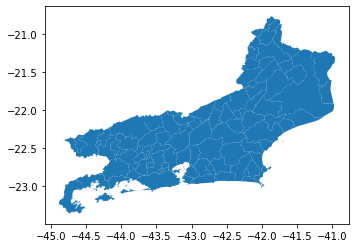

In [24]:
rj.plot()

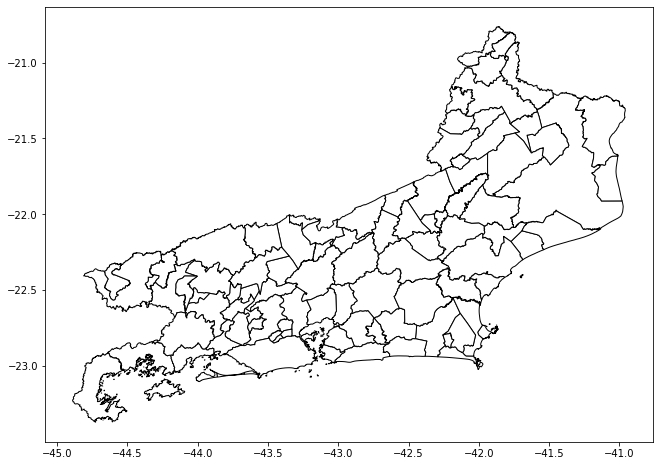

In [25]:
rj.plot(color='white', edgecolor='black', figsize=(15,8))

In [26]:
from shapely.geometry import Polygon, Point, LineString, MultiPolygon

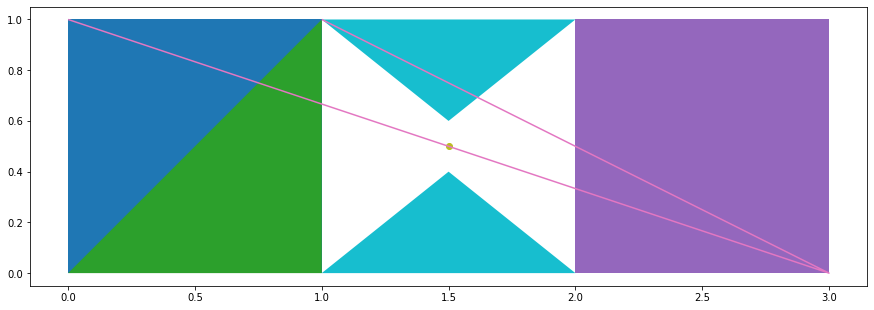

In [35]:
p1 = Polygon([(0,0),(1,0),(1,1),(0,1)])
p2 = Polygon([(0,0),(1,0),(1,1)])
p3 = Polygon([(2,0),(3,0),(3,1),(2,1)])
p4 = LineString([(0,1),(3,0),(1,1)])
p5 = Point(1.5,0.5)
p6 = Polygon([(1,0),(1.5,0.4),(2,0)])
p7 = Polygon([(1,1),(1.5,0.6),(2,1)])
p8 = MultiPolygon([p6, p7])
g = gpd.GeoSeries([p1,p2,p3,p4,p5,p8])
g.plot(cmap='tab10', figsize=(15,8))